In [20]:
import math

data = []  # List to store the data
filename = f"data\epsnx0.03_alfax-0.04_betax273.40_epsny0.10_alfay-0.55_betay170.00_epsnz5.00_alfaz0.10_betaz10.00\coord.out"

class Particle:
    def __init__(self, Nseed, iq, dt, dW, x, x_prime, y, y_prime):
        self.Nseed = Nseed
        self.iq = iq
        self.dt = dt
        self.dW = dW
        self.x = x
        self.x_prime = x_prime
        self.y = y
        self.y_prime = y_prime
        self.z = 0

    def __repr__(self):
        return f"Particle(Nseed={self.Nseed}, iq={self.iq}, dt={self.dt}, dW={self.dW}, x={self.x}, x'={self.x_prime}, y={self.y}, y'={self.y_prime})"

    def propagate(self, distance):
        import math
        # print(str(self.x) + " " + str(self.y), end=" ")
        # convert angles from milliradians to radians
        angle_x = self.x_prime / 1000 
        angle_y = self.y_prime / 1000
        # print("->", end=" ")
        # calculate new positions
        self.x += distance * math.tan(angle_x)
        self.y += distance * math.tan(angle_y)
        # print(str(self.x) + " " + str(self.y))


with open(filename, 'r') as file:
    next(file)  # Skip the header line
    for line in file:
        line = line.strip()
        if line:
            values = line.split()
            particle = Particle(
                Nseed=int(values[0]),
                iq=int(values[1]),
                dt=float(values[2]),
                dW=float(values[3]),
                x=float(values[4]),
                x_prime=float(values[5]),
                y=float(values[6]),
                y_prime=float(values[7])
            )
            data.append(particle)

# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt

# # Assume data is list of Particles
# x_vals = [particle.x for particle in data]
# y_vals = [particle.y for particle in data]
# z_vals = [particle.z for particle in data]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Scatter plot of x, y, z
# ax.scatter(x_vals, y_vals, z_vals)

# ax.set_xlabel('x [cm]')
# ax.set_ylabel('y [cm]')
# ax.set_zlabel('dt [nsec]')
# ax.set_xlim(-3, 3)  # Set x-axis limits
# ax.set_ylim(-3, 3)  # Set y-axis limits
# ax.set_zlim(-3, 3)   # Set z-axis limits
# plt.title('3D Scatter Plot')

# plt.show()


In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Hole:
    def __init__(self, center_x, center_y, center_z, diameter):
        self.center_x = center_x
        self.center_y = center_y
        self.center_z = center_z
        self.diameter = diameter

    def __repr__(self):
        return f"Hole(center_x={self.center_x}, center_y={self.center_y}, center_z={self.center_z}, diameter={self.diameter})"
    
class Grid:
    def __init__(self, size_x, size_y, size_z, hole_diameter, separation):
        self.size_x = size_x
        self.size_y = size_y
        self.size_z = size_z
        self.hole_diameter = hole_diameter
        self.separation = separation
        self.holes = self.create_3d_grid()

    def create_3d_grid(self):
        holes = []
        center_x_offset = ((self.size_x - 1) * self.separation) / 2
        center_y_offset = ((self.size_y - 1) * self.separation) / 2
        center_z_offset = ((self.size_z - 1) * self.separation) / 2
        for x in range(self.size_x):
            for y in range(self.size_y):
                for z in range(self.size_z):
                    hole = Hole(center_x=x*self.separation - center_x_offset, 
                                 center_y=y*self.separation - center_y_offset, 
                                 center_z=z*self.separation - center_z_offset, 
                                 diameter=self.hole_diameter)
                    holes.append(hole)
        return holes

    def plot3D(self, ax=None):
        xs = [hole.center_x for hole in self.holes]
        ys = [hole.center_y for hole in self.holes]
        zs = [hole.center_z for hole in self.holes]
        
        if ax is None:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
        
        ax.scatter(xs, ys, zs, c='red')

    def add_to_plot3D(self, ax):
        self.plot3D(ax)

    def add_to_plot_2d(self, ax):
        # Add the grid to the 2D plot
        import matplotlib.patches as patches
        for hole in self.holes:
            ax.plot(hole.center_x, hole.center_y, 'ro')

            # Add circle representing the hole's circumference
            circle = patches.Circle((hole.center_x, hole.center_y), radius=hole.diameter/2, edgecolor='red', facecolor='none')
            ax.add_patch(circle)


    def is_point_in_a_hole(self, point):
        x1, y1, z1 = point
        hole_radius = self.hole_diameter / 2

        # Calculate the indices of the hole the point would belong to if it was in a hole
        x_index = round(x1 / self.separation)
        y_index = round(y1 / self.separation)
        z_index = round(z1 / self.separation)

        # Calculate the center of that hole
        x_center = x_index * self.separation
        y_center = y_index * self.separation
        z_center = z_index * self.separation

        # Check if the point is inside the hole
        # return ((x_center - x1)**2 + (y_center - y1)**2 + (z_center - z1)**2) <= hole_radius**2
        return (x_center - hole_radius <= x1 <= x_center + hole_radius and
                y_center - hole_radius <= y1 <= y_center + hole_radius and
                z_center - hole_radius <= z1 <= z_center + hole_radius)

# # Specify the grid size, hole diameter, and separation
# size_x, size_y, size_z = 21, 21, 1
# hole_diameter = 1
# separation = 2

# # Create an instance of the Grid class
# grid = Grid(size_x, size_y, size_z, hole_diameter, separation)

# # Print the first hole in the grid
# print(grid.holes[0])

# # Use the plot method of the Grid class to create the 3D scatter plot
# grid.plot3D()



In [22]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Assuming `data` is a list of `Particle` instances
# x = [particle.x for particle in data]
# y = [particle.y for particle in data]
# z = [particle.z for particle in data]  # Use the z parameter of the particle instances

# # Create a 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Scatter plot of x, y, z of the particles
# ax.scatter(x, y, z, label='Particles')

# # Specify the grid size, hole diameter, and separation
# size_x, size_y, size_z = 21, 21, 1
# hole_diameter = 0.03
# separation = 0.3

# # Now create the grid of holes and add to the plot
# grid = Grid(size_x, size_y, size_z, hole_diameter, separation)
# grid.add_to_plot3D(ax)

# ax.set_xlabel('x [cm]')
# ax.set_ylabel('y [cm]')
# ax.set_zlabel('z [cm]')
# plt.title('3D Scatter Plot of Particles and Grid')
# plt.legend()
# plt.show()


Actual process

Text(0.5, 1.0, 'Heat Map of Particles Inside Holes with Grid')

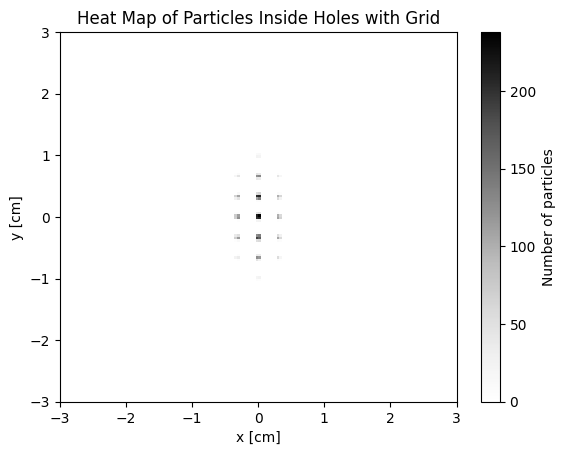

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

size_x, size_y, size_z = 40, 40, 1
hole_diameter = 0.01
separation = 0.3
# shrinking to 0.1 creates higher fidelity image

grid = Grid(size_x, size_y, size_z, hole_diameter, separation)

particles_in_holes = []
for particle in data:
    point = (particle.x, particle.y, particle.z)
    if grid.is_point_in_a_hole(point):
        particles_in_holes.append(particle)

for particle in particles_in_holes:
    particle.propagate(30)

# fig, ax = plt.subplots()

# if particles_in_holes:
#     x_in_holes = [particle.x for particle in particles_in_holes]
#     y_in_holes = [particle.y for particle in particles_in_holes]

#     ax.scatter(x_in_holes, y_in_holes, c='blue', label='Particles in holes')

# grid.add_to_plot_2d(ax)

# ax.set_xlabel('x [cm]')
# ax.set_ylabel('y [cm]')
# plt.title('Particles Inside Holes and Grid (2D Projection)')
# plt.legend()
# plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

if particles_in_holes:
    x_in_holes = [particle.x for particle in particles_in_holes]
    y_in_holes = [particle.y for particle in particles_in_holes]
    z_in_holes = [particle.z for particle in particles_in_holes]

    # ax.scatter(x_in_holes, y_in_holes, z_in_holes, c='blue', label='Particles in holes')

# grid.add_to_plot3D(ax)

# ax.set_xlabel('x [cm]')
# ax.set_ylabel('y [cm]')
# ax.set_zlabel('z [cm]')
# plt.title('Particles Inside Holes and Grid')
# plt.legend()
# plt.show()

# HEAT MAP CODE

import numpy as np
import matplotlib.pyplot as plt

bins_hist = 150
bins_grid = size_x

histo_width = ((size_x * separation) / 2) - 3
edges_hist = np.linspace(-histo_width, histo_width, bins_hist + 1)
# edges_grid = np.linspace(-histo_width, histo_width, bins_grid + 1)  # Updated grid limits

H, _, _ = np.histogram2d(x_in_holes, y_in_holes, bins=[edges_hist, edges_hist])

fig, ax = plt.subplots()

pcm = ax.pcolormesh(edges_hist, edges_hist, H.T, cmap='Greys')

cbar = fig.colorbar(pcm, ax=ax, label='Number of particles')

# for edge in edges_grid:
#     ax.axhline(edge, color='white', linewidth=0.5)
#     ax.axvline(edge, color='white', linewidth=0.5)

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
plt.title('Heat Map of Particles Inside Holes with Grid')
#plt.show()

ValueError: Format 'out' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

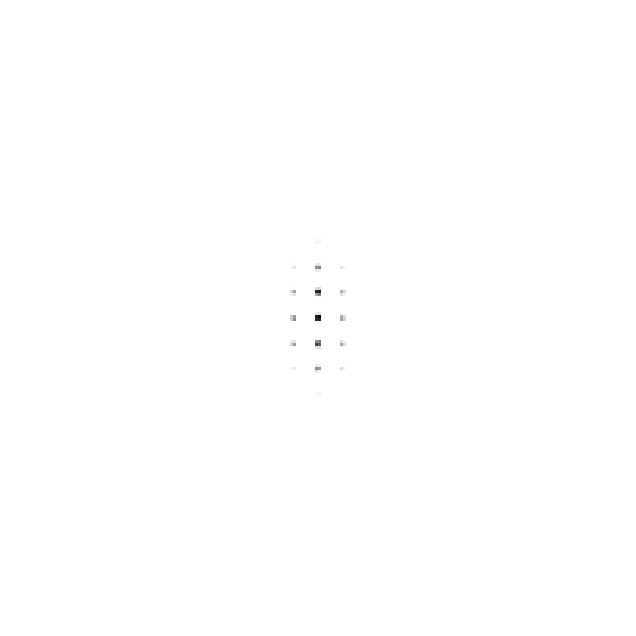

In [24]:
# cleaned heatmap code
import numpy as np
import matplotlib.pyplot as plt

bins_hist = 200
bins_grid = size_x

histo_width = (size_x * separation) / 2 - 2
edges_hist = np.linspace(-histo_width, histo_width, bins_hist + 1)

H, _, _ = np.histogram2d(x_in_holes, y_in_holes, bins=[edges_hist, edges_hist])

fig, ax = plt.subplots(figsize=(6, 6))

pcm = ax.pcolormesh(edges_hist, edges_hist, H.T, cmap='Greys')

ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.axis('square')

plt.savefig("heatmap.png", dpi=64, bbox_inches='tight', pad_inches=0)
plt.close(fig)

print("Heatmap image generated successfully: heatmap.png")


In [ ]:
# reading in a csv
import csv
import json
import math
from typing import List

class Particle:
    def __init__(self, Nseed, iq, dt, dW, x, x_prime, y, y_prime):
        self.Nseed = Nseed
        self.iq = iq
        self.dt = dt
        self.dW = dW
        self.x = x
        self.x_prime = x_prime
        self.y = y
        self.y_prime = y_prime
        self.z = 0

    def __repr__(self):
        return f"Particle(Nseed={self.Nseed}, iq={self.iq}, dt={self.dt}, dW={self.dW}, x={self.x}, x'={self.x_prime}, y={self.y}, y'={self.y_prime})"

    def propagate(self, distance):
        # convert angles from milliradians to radians
        angle_x = self.x_prime / 1000 
        angle_y = self.y_prime / 1000
        # calculate new positions
        self.x += distance * math.tan(angle_x)
        self.y += distance * math.tan(angle_y)


def json_to_csv_and_particles(filename: str) -> List[Particle]:
    with open(filename, 'r') as json_file:
        data = json.load(json_file)

    # Convert list of lists to list of dictionaries
    keys = data[0]
    data_dicts = [dict(zip(keys, values)) for values in data[1:]]

    # Writing to CSV
    csv_filename = filename.replace('.json', '.csv')
    with open(csv_filename, 'w') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=keys)
        writer.writeheader()
        writer.writerows(data_dicts)

    # Creating list of Particle objects
    particles = [Particle(**particle) for particle in data_dicts]
    return particles


if __name__ == "__main__":
    particles = json_to_csv_and_particles('./data/particleslist.json')


In [ ]:
# Assuming particles is your list of Particle objects
positions_x = [particle.x for particle in particles]
momenta_x = [particle.x_prime for particle in particles]

positions_y = [particle.y for particle in particles]
momenta_y = [particle.y_prime for particle in particles]

# Generate colors based on the angle in x and y direction
angles_x = np.arctan2(momenta_x, positions_x)
colors_x = cm.viridis((angles_x - angles_x.min()) / (angles_x.max() - angles_x.min()))

angles_y = np.arctan2(momenta_y, positions_y)
colors_y = cm.viridis((angles_y - angles_y.min()) / (angles_y.max() - angles_y.min()))

# Plot for x
plt.figure(figsize=(8, 6))
plt.scatter(positions_x, momenta_x, c=colors_x)
plt.xlabel('Position X')
plt.ylabel('Momentum X')
plt.title('Particle Distribution in X direction')
plt.grid(True)
plt.colorbar(label='Angle X (rad)')
plt.show()

# Plot for y
plt.figure(figsize=(8, 6))
plt.scatter(positions_y, momenta_y, c=colors_y)
plt.xlabel('Position Y')
plt.ylabel('Momentum Y')
plt.title('Particle Distribution in Y direction')
plt.grid(True)
plt.colorbar(label='Angle Y (rad)')
plt.show()

# Assuming particles is your list of Particle objects
positions_x = [particle.x for particle in particles]
positions_y = [particle.y for particle in particles]

# Create a new figure for the scatter plot
plt.figure(figsize=(8, 6))

# Create the scatter plot
plt.scatter(positions_x, positions_y, alpha=0.5)

# Add title and labels
plt.title('Particle positions on Scintillating Screen')
plt.xlabel('Position X')
plt.ylabel('Position Y')

# Display the grid
plt.grid(True)

# Show the plot
plt.show()


NameError: name 'cm' is not defined